In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, zero_one_loss
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [17]:
df = pd.read_csv('/Users/wugaoyi/Learning/cs513/final_project/creditcard.csv',na_values='?')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
# what is target or attribute
df['class']=df['class'].astype('category')
attr = df.drop(columns=['class'])
target = df['class']
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

### EDA

In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.649999e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.248366e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.054600e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.777971e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179749e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


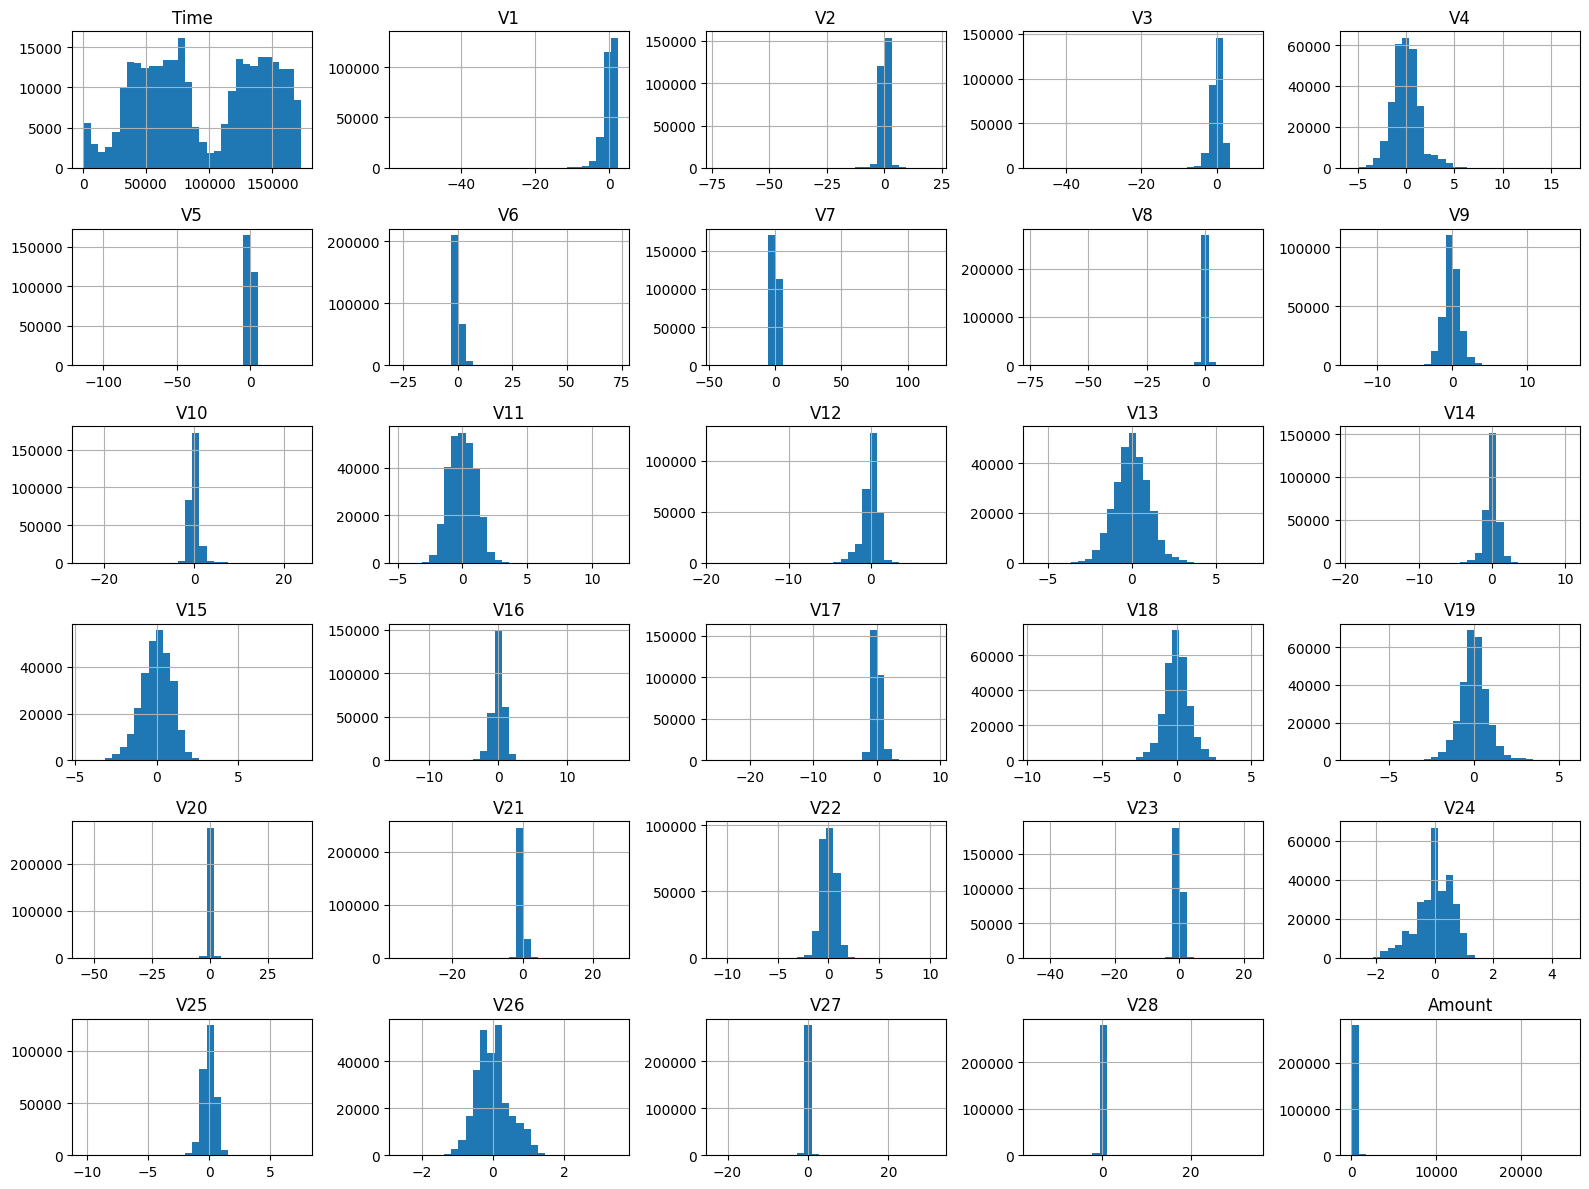

In [20]:
numerical_columns = df.select_dtypes(include='float64')
numerical_columns.hist(bins=30, figsize=(16, 12))
plt.tight_layout()
plt.show()
plt.show()

Almost all the features, look like, follow the normal distribution. However, it's better to check again after getting a subset of the dataset.

class
0    99.827251
1     0.172749
Name: count, dtype: float64


<Axes: xlabel='class', ylabel='count'>

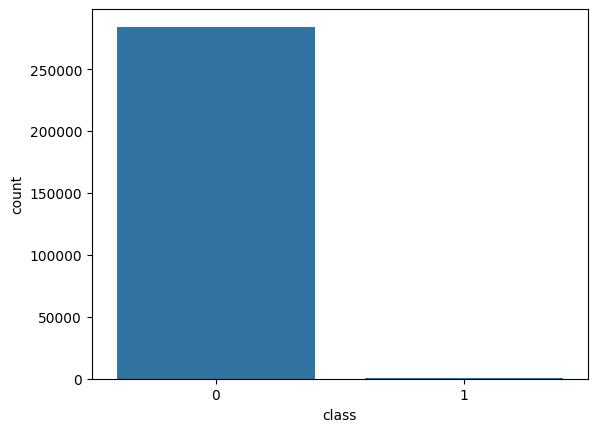

In [21]:
print(target.value_counts()/target.value_counts().sum()*100)
sns.countplot(data=df,x='class')

As can be seen from the previous cell the dataset is highly imbalanced state. Even if ramdomly we say that any transaction is not fraudalent, we have 99.83% chance that we're right. That's why we need to bring the dataset into balance either using Random undersampling or oversampling using SMOTE. In addition, we need to use StratifiedKFold while evaluating candidate algorithms.

As you can see there are alot of outliers in most of the feature. If we remove them now, it may increase the imbalanced state of the dataset. That's why while pre-processing the data, we should first focus on balancing it, then detect and remove the outliers in the balanced dataset.

In [22]:
#correlation matrix
corr_matrix = df.corr()
print(corr_matrix['class'].sort_values(ascending=False))
corr_matrix.style.background_gradient(cmap='coolwarm')

class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: class, dtype: float64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.098732,0.133447
V5,0.173072,-0.000000,-0.000000,-0.000000,-0.000000,1.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,-0.000000,0.000000,-0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.397311,-0.187257
V8,-0.036949,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.103079,0.019875
V9,-0.008660,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.044246,-0.097733


There are some features that have high correlation to eachother such as Time and V3, V5 and Amount and etc. This might have a negative impact on the performance of the model. It's better to apply some kind of feature selection method to eleminate this impact.

In [23]:

rows,columns=df.shape
print(f'the number of rows before removal duplicated data {rows}')
df = df.dropna()
print(f'the number of duplicated data we have droped {df.duplicated().sum()}')
df = df.drop_duplicates()
rows,columns=df.shape
print(f'the number of rows after removal non and duplicated data {rows}')

the number of rows before removal duplicated data 284807
the number of duplicated data we have droped 1081
the number of rows after removal non and duplicated data 283726


In [24]:
# train test split
attr = df.drop(columns=['class'])
target = df['class']
X_train,X_test,y_train,y_test = train_test_split(attr,target,test_size=0.2,random_state=100)
print(y_train.value_counts())
print(y_test.value_counts())

class
0    226620
1       360
Name: count, dtype: int64
class
0    56633
1      113
Name: count, dtype: int64


In [25]:
#undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy=0.5)
X_train_resampled,y_train_resampled = under_sampler.fit_resample(X_train,y_train)
print('resampled shape of X_train: ', X_train_resampled.shape)
print('resampled shape of y_train: ', y_train_resampled.shape)
print(y_train_resampled.value_counts())

resampled shape of X_train:  (1080, 30)
resampled shape of y_train:  (1080,)
class
0    720
1    360
Name: count, dtype: int64


In [26]:
#standardscaler
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)#X_train_resampled is dataframe

In [27]:
# feature extraction
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=100)
model.fit(X_train_resampled_scaled, y_train_resampled)
importances = model.feature_importances_
indices_desc = np.argsort(importances)[::-1]
top_feature_indices = indices_desc[:8]
print("Top feature indices:", top_feature_indices)
top_feature_names = X_train_resampled.columns[top_feature_indices]
print("Top features:", top_feature_names.tolist())

Top feature indices: [14 12  4 11 17  3 16 10]
Top features: ['V14', 'V12', 'V4', 'V11', 'V17', 'V3', 'V16', 'V10']


In [28]:
X_train_selected_scaled = X_train_resampled_scaled[:, top_feature_indices]
X_test_selected = X_test[top_feature_names]
scaler_selected = StandardScaler()
X_train_selected_scaled = scaler_selected.fit_transform(X_train_resampled[top_feature_names])
X_test_selected_scaled = scaler_selected.transform(X_test_selected)


Confusion Matrix:
[[55126  1507]
 [    8   105]]

Accuracy: 0.9733020829662002

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56633
           1       0.07      0.93      0.12       113

    accuracy                           0.97     56746
   macro avg       0.53      0.95      0.55     56746
weighted avg       1.00      0.97      0.98     56746


ROC AUC Score: 0.9792106575343278


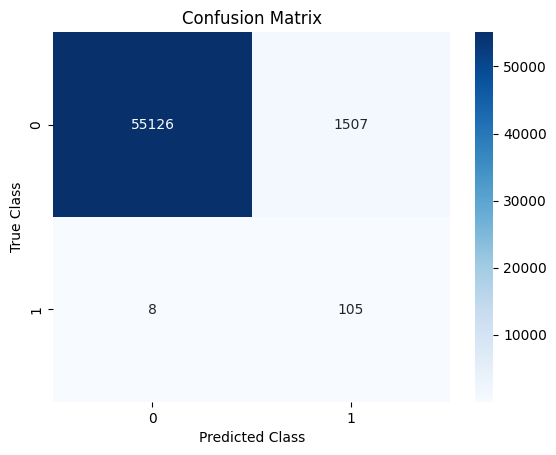

In [29]:
clf = LogisticRegression(C=100, penalty='l2', solver='newton-cg', random_state=1, class_weight='balanced')
clf.fit(X_train_selected_scaled, y_train_resampled)
probs = clf.predict_proba(X_test_selected_scaled)
preds = clf.predict(X_test_selected_scaled)
# probs = clf.predict_proba(X_test_selected_scaled)  
# threshold = 0.5
# preds = (probs[:,1] >= threshold).astype(int)

# if y_test.dtype.name == 'category':
#     y_test_numeric = y_test.cat.codes
# else:
#     y_test_numeric = y_test

cm = confusion_matrix(y_test, preds)
acc = accuracy_score(y_test, preds)
report = classification_report(y_test, preds)
roc_auc = roc_auc_score(y_test, probs[:,1])

print("\nConfusion Matrix:")
print(cm)
print("\nAccuracy:", acc)
print("\nClassification Report:\n", report)
print("\nROC AUC Score:", roc_auc)

ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
plt.show()

{'n_neighbors': 3}

Confusion Matrix:
[[55349  1284]
 [   11   102]]

Accuracy: 0.9771790082120325

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56633
           1       0.07      0.90      0.14       113

    accuracy                           0.98     56746
   macro avg       0.54      0.94      0.56     56746
weighted avg       1.00      0.98      0.99     56746


ROC AUC Score: 0.9618889140122656


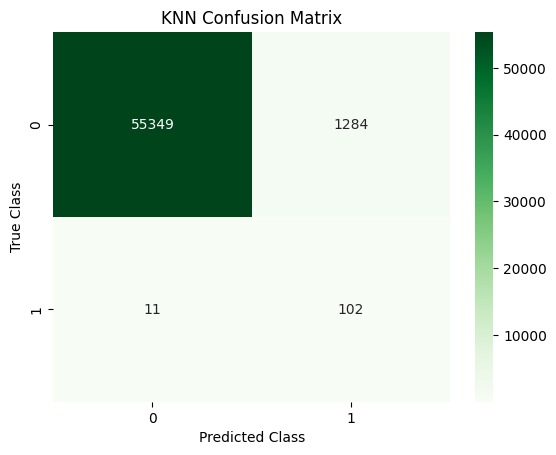

In [30]:

from sklearn.neighbors import KNeighborsClassifier
param_grid ={
    'n_neighbors':[1,2,3,4,5,6]
}
clf = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=clf,param_grid=param_grid,scoring='accuracy',cv=5,n_jobs=-1)
grid_search.fit(X_train_selected_scaled, y_train_resampled)

probs_knn = grid_search.predict_proba(X_test_selected_scaled)
preds_knn = grid_search.predict(X_test_selected_scaled)

cm_knn = confusion_matrix(y_test, preds_knn)
acc_knn = accuracy_score(y_test, preds_knn)
report_knn = classification_report(y_test, preds_knn)
roc_auc_knn = roc_auc_score(y_test,probs_knn[:,1])

print(grid_search.best_params_)
print("\nConfusion Matrix:")
print(cm_knn)
print("\nAccuracy:", acc_knn)
print("\nClassification Report:\n", report_knn)
print("\nROC AUC Score:", roc_auc_knn)

ax = plt.subplot()
sns.heatmap(cm_knn, annot=True, fmt="d", ax=ax, cmap="Greens")
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')
ax.set_title('KNN Confusion Matrix')
plt.show()